In [26]:
import numpy as np
from functions import *
from scipy import stats
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Ex1 - Metropolis Algorithm (Toy Example)

Acceptance rate: 0.90


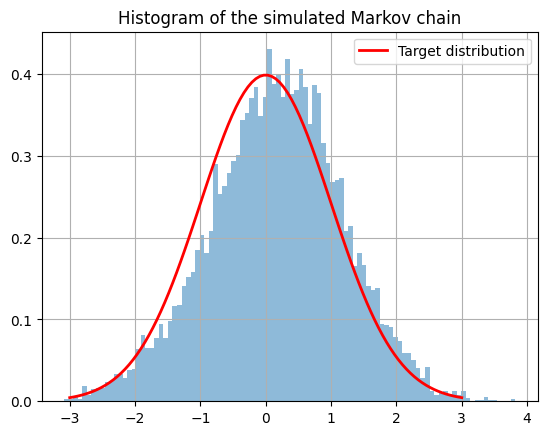

In [27]:
n = 10**4

sample, rate = sample_metropolis(stats.uniform(loc=-0.5, scale=1), n, init=stats.uniform.rvs(loc=-3, scale=6))
print(f"Acceptance rate: {rate:.2f}")

def plot_metropolis(sample):
    plt.hist(sample, bins=100, density=True, alpha=0.5)
    x = np.linspace(-3, 3, 100)
    plt.plot(x, stats.norm.pdf(x), 'r', lw=2, label='Target distribution')
    plt.legend()
    plt.title("Histogram of the simulated Markov chain")
    plt.show()

plot_metropolis(sample)

Acceptance rate: 0.98


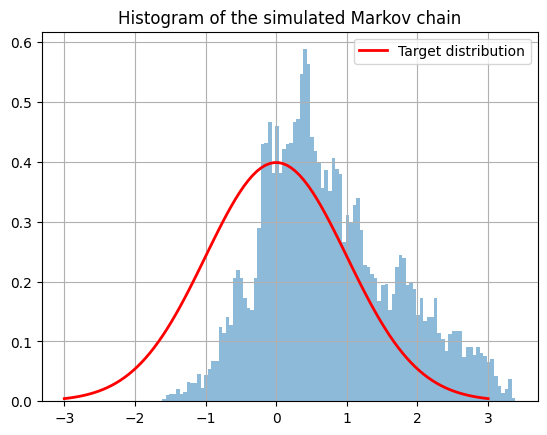

In [28]:
loc = -0.1
scale = 0.2
x_init = stats.uniform.rvs(loc=-3, scale=6)
sample, rate = sample_metropolis(stats.uniform(loc=loc, scale=scale), n, init=x_init)
print(f"Acceptance rate: {rate:.2f}")
plot_metropolis(sample)

Acceptance rate: 0.16


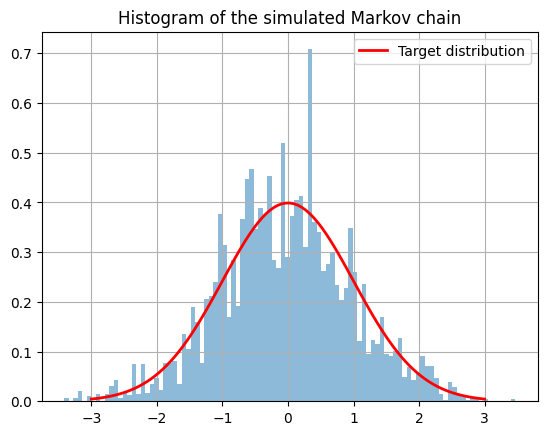

In [29]:
loc = -10
scale = 20
x_init = stats.uniform.rvs(loc=-3, scale=6)
sample, rate = sample_metropolis(stats.uniform(loc=loc, scale=scale), n, init=x_init)
print(f"Acceptance rate: {rate:.2f}")
plot_metropolis(sample)

### Ex2: Metropolis vs. Rejection Sampling

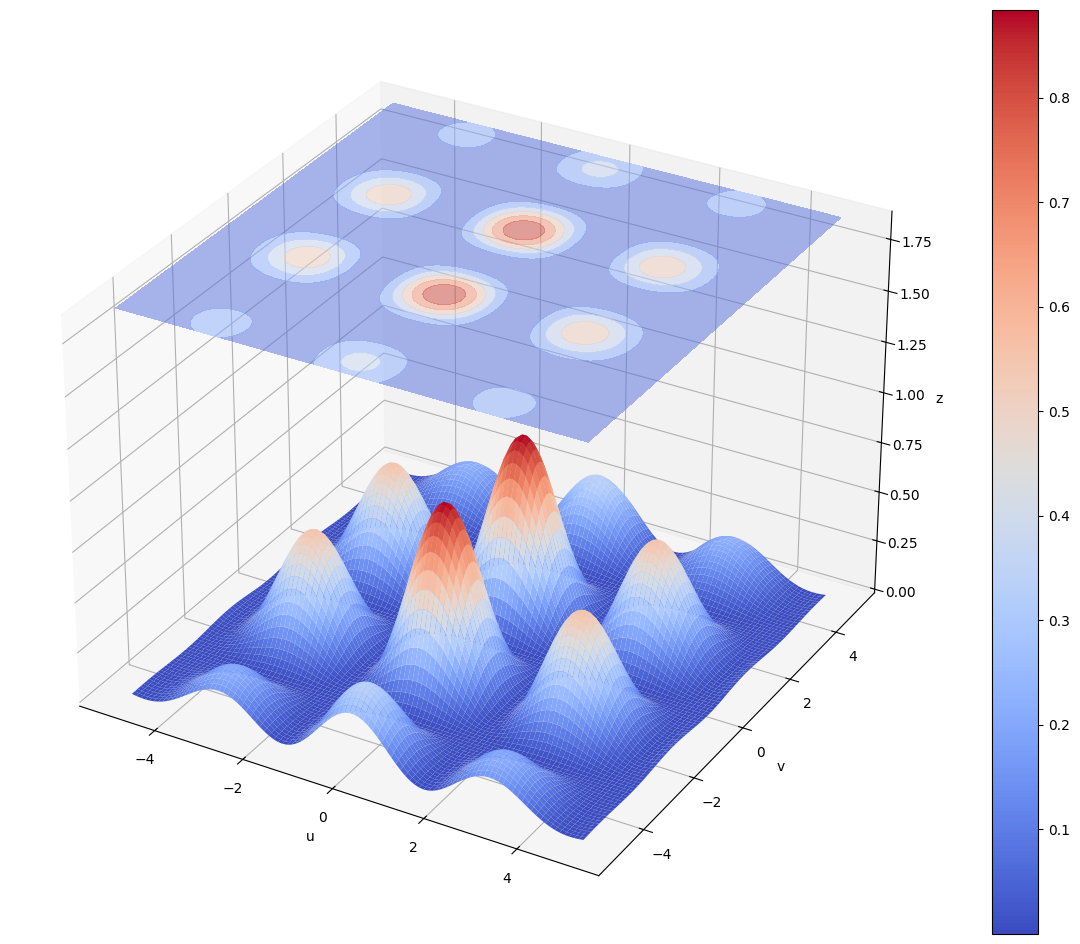

In [30]:
def plot_surf(U, V, Z, figsize=(15, 12)):
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection='3d'))
    plt.rcParams['axes.grid'] = False
    surf = ax.plot_surface(U, V, Z, rstride=1, cstride=1, cmap="coolwarm", linewidth=0)
    ax.contourf(U, V, Z, zdir='z', offset=Z.max()+1, cmap="coolwarm", alpha=0.5)
    ax.set_zlim(top=Z.max()+1)
    fig.colorbar(surf)
    ax.set_xlabel('u')
    ax.set_ylabel('v')
    ax.set_zlabel('z')
    plt.rcParams['axes.grid'] = True
    plt.show()
    return fig, ax

def density(U, V):
    return np.cos(U)**2 * np.sin(V)**2 * np.exp(-0.05 * (U**2 + V**2))

u = np.linspace(-5, 5, num=100)
v = np.linspace(-5, 5, num=100)
U, V = np.meshgrid(u, v)  

Z = density(U, V)
fig, ax = plot_surf(U, V, Z)

In [31]:
# Q3
n = 10**4
sigma = 1

kernel = stats.multivariate_normal(cov=sigma**2 * np.eye(2))
sample, rate = sample_metropolis_2d(kernel, density, n)
print(f"Taux d'acceptation : {rate}")

Taux d'acceptation : 0.4368


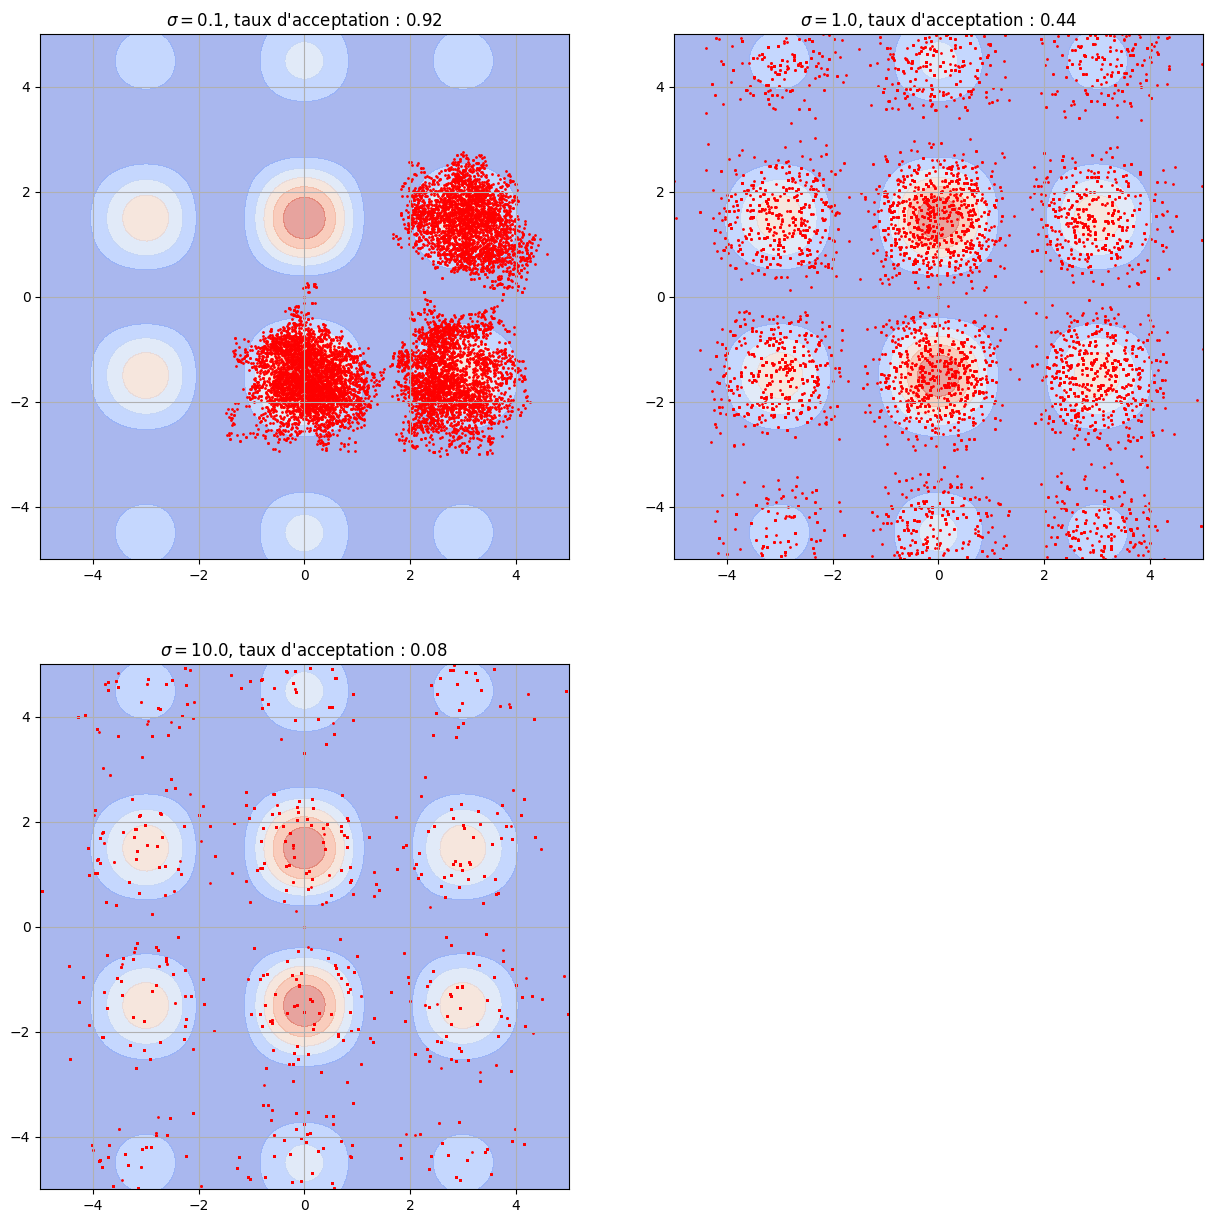

In [32]:
# Q4
plt.figure(figsize=(15, 15))
for i, sigma in enumerate([0.1, 1, 10]):
    kernel = stats.multivariate_normal(cov=sigma**2 * np.eye(2))
    sample, rate = sample_metropolis_2d(kernel, density, n)
    plt.subplot(2, 2, i+1)
    plt.contourf(U, V, Z, cmap="coolwarm", alpha=0.5)
    plt.scatter(*sample.T, c='r', s=1)
    plt.xlim([U.min(), U.max()])
    plt.ylim([V.min(), V.max()])
    plt.title(f"$\\sigma={sigma:.1f}$, taux d'acceptation : {rate:.2f}")

Acceptance rate: 0.25


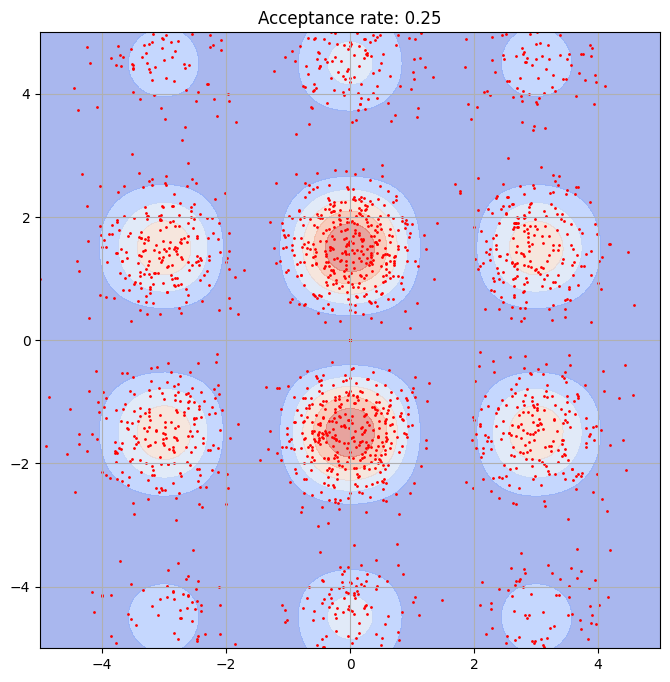

In [33]:
# Q5
proposal = stats.multivariate_normal(cov=10*np.eye(2))
n = 10**4
samples, rate = rejection_sampling(proposal, n)
print(f"Acceptance rate: {rate:.2f}") 
plt.figure(figsize=(8, 8))
plt.contourf(U, V, Z, cmap="coolwarm", alpha=0.5)
plt.scatter(*samples.T, c='r', s=1)
plt.xlim([U.min(), U.max()])
plt.ylim([V.min(), V.max()])
plt.title(f"Acceptance rate: {rate:.2f}");